In [1]:
# Import necessary libraries for data handling and visualization, as well as the KNN classifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset from a text file, specifying the separator and column names
df = pd.read_csv("seeds_dataset.txt", sep='\\t', engine='python')
df.columns = ['a', 'p', 'compactness', 'length', 'width', 'coeff', 'length_g', 'type']
print(df.head)

<bound method NDFrame.head of          a      p  compactness  length  width  coeff  length_g  type
0    14.88  14.57       0.8811   5.554  3.333  1.018     4.956     1
1    14.29  14.09       0.9050   5.291  3.337  2.699     4.825     1
2    13.84  13.94       0.8955   5.324  3.379  2.259     4.805     1
3    16.14  14.99       0.9034   5.658  3.562  1.355     5.175     1
4    14.38  14.21       0.8951   5.386  3.312  2.462     4.956     1
..     ...    ...          ...     ...    ...    ...       ...   ...
204  12.19  13.20       0.8783   5.137  2.981  3.631     4.870     3
205  11.23  12.88       0.8511   5.140  2.795  4.325     5.003     3
206  13.20  13.66       0.8883   5.236  3.232  8.315     5.056     3
207  11.84  13.21       0.8521   5.175  2.836  3.598     5.044     3
208  12.30  13.34       0.8684   5.243  2.974  5.637     5.063     3

[209 rows x 8 columns]>


In [3]:
# Split the dataset into training and testing sets, with 70% of the data for training
# The features used for training are all except 'type', which is used as the label
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['type']), df['type'], test_size=.3)

In [29]:
# Initialize the KNN classifier with 3 neighbors, fit it to the training data
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [30]:
# Predict the labels for the test set
prediction = classifier.predict(X_test)

In [31]:
# Calculate the number of correct predictions
correct = np.where(prediction==y_test, 1, 0).sum()
print(correct)

61


In [32]:
# Calculate and print the accuracy of the classifier
accuracy = correct / len(y_test)
print(accuracy)

0.9682539682539683


In [33]:
# Initialize an empty list to store the results of different k values
results = []

In [34]:
# Loop over k values from 1 to 50, stepping by 2, to find the best performing k
for k in range(1, 51, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    accuracy = np.where(prediction==y_test, 1, 0).sum() / len(y_test)
    print("k=", k, " Accuracy=", accuracy)
    results.append([k, accuracy])  # Append the k and its corresponding accuracy to the results list

k= 1  Accuracy= 0.9047619047619048
k= 3  Accuracy= 0.9206349206349206
k= 5  Accuracy= 0.9365079365079365
k= 7  Accuracy= 0.9682539682539683
k= 9  Accuracy= 0.9682539682539683
k= 11  Accuracy= 0.9365079365079365
k= 13  Accuracy= 0.9365079365079365
k= 15  Accuracy= 0.9047619047619048
k= 17  Accuracy= 0.8888888888888888
k= 19  Accuracy= 0.9047619047619048
k= 21  Accuracy= 0.8888888888888888
k= 23  Accuracy= 0.9047619047619048
k= 25  Accuracy= 0.9206349206349206
k= 27  Accuracy= 0.9206349206349206
k= 29  Accuracy= 0.9047619047619048
k= 31  Accuracy= 0.9047619047619048
k= 33  Accuracy= 0.9047619047619048
k= 35  Accuracy= 0.9206349206349206
k= 37  Accuracy= 0.9047619047619048
k= 39  Accuracy= 0.9206349206349206
k= 41  Accuracy= 0.9206349206349206
k= 43  Accuracy= 0.8888888888888888
k= 45  Accuracy= 0.9206349206349206
k= 47  Accuracy= 0.9206349206349206
k= 49  Accuracy= 0.9206349206349206


In [35]:
# Convert the list of results into a DataFrame for easy plotting
results = pd.DataFrame(results, columns=["k", "accuracy"])

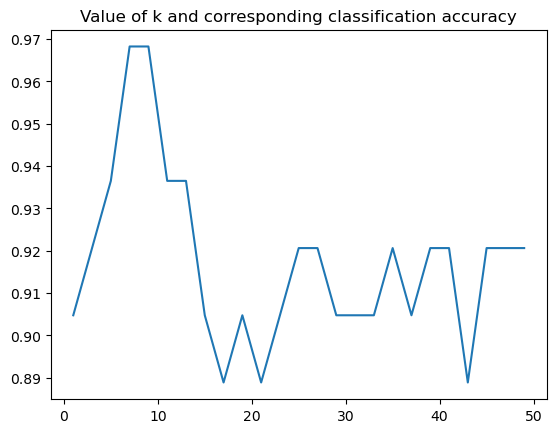

In [28]:
# Plot the accuracy of the classifier as a function of k
plt.plot(results.k, results.accuracy)
plt.title("Value of k and corresponding classification accuracy")
plt.show()